Task is to predict whether customer will default with
their loan paying.
Binary classification task , using Keras and TF.

In [1]:
#import libraries

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_info = pd.read_csv('DATA/lending_club_info.csv', index_col='LoanStatNew')

In [5]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [6]:
# information about columns inside data
# custom function which gives information about each column
# in the data

In [8]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [9]:
def info_of_features(col_name):
    print(data_info.loc[col_name]['Description'])

In [10]:
info_of_features('mort_acc')

Number of mortgage accounts.


In [11]:
info_of_features('pub_rec_bankruptcies')

Number of public record bankruptcies


In [12]:
info_of_features('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


### Load Data

In [13]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [42]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


In [15]:
len(df)

396030

In [16]:
# can I take a fraction of this data ?
# looks huge!

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

Missing values are present in:
emp_title , emp_length,title,revol_util,mort_acc,pub_rec_bankruptcies

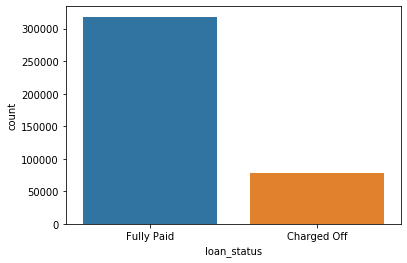

In [19]:
# check the target for balance

sns.countplot(df.loan_status)


This is not balanced (unbalanced) dataset.

In [22]:
# histogram to see how much loan is taken by people

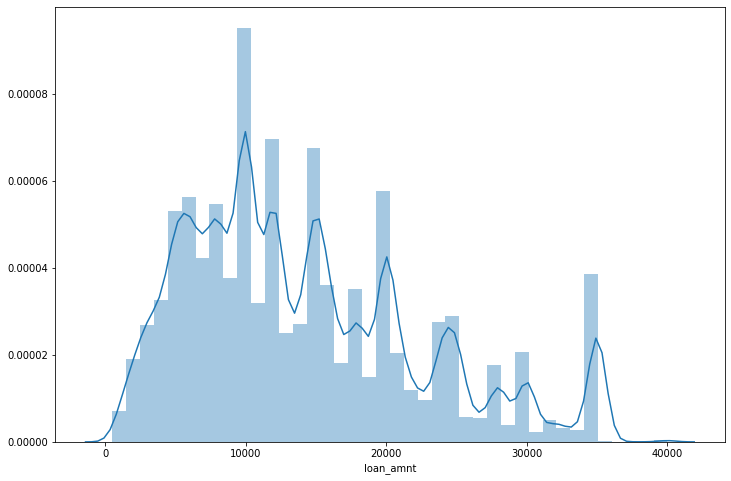

In [23]:
plt.figure(figsize=(12,8))
sns.distplot(df['loan_amnt'],bins=40)

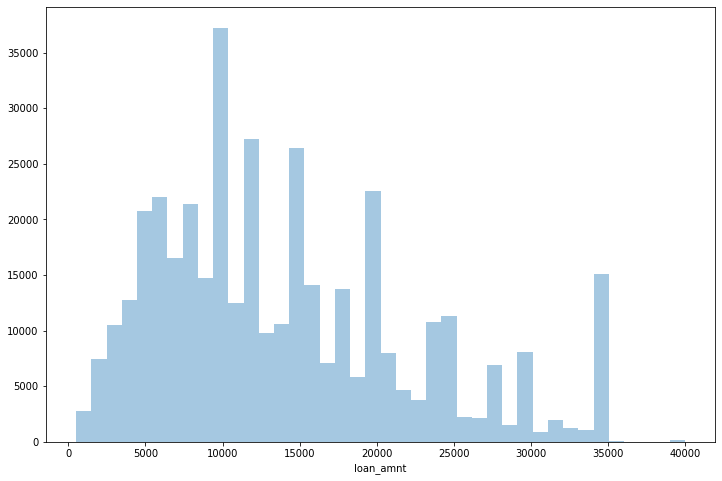

In [24]:
plt.figure(figsize=(12,8))
sns.distplot(df['loan_amnt'],kde=False,bins=40)

In [25]:
# check for correlation

In [26]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


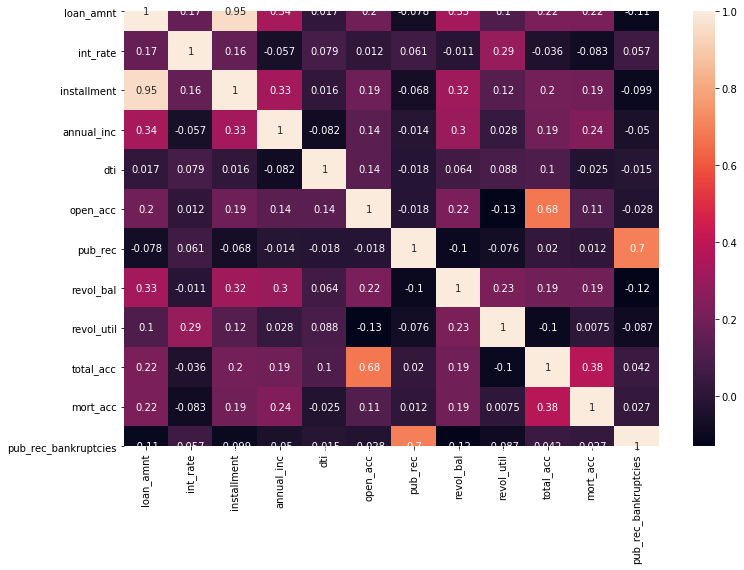

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

(10, 0)

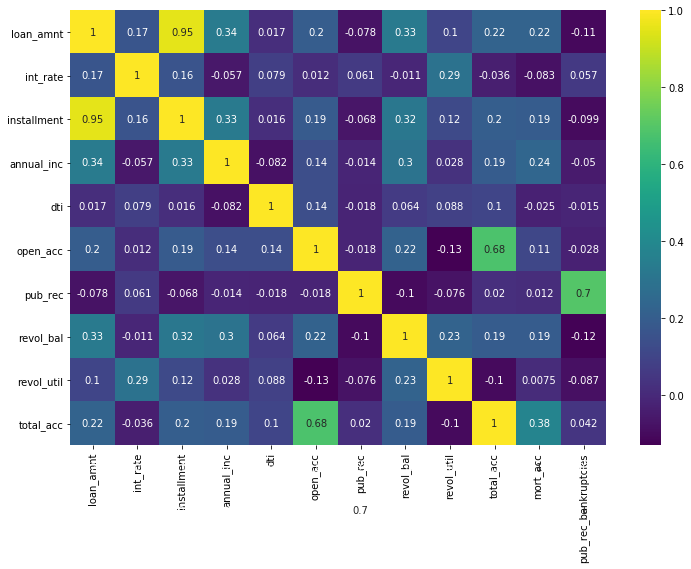

In [30]:
# chanhing color mapping

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.ylim(10,0) # this line to stretch the size of heatmap

installment feature has 0.95 correlation with target i.e 
loan_amnt 


In [31]:
# is there duplicate information in installement and target ?

In [33]:
info_of_features('installment')

The monthly payment owed by the borrower if the loan originates.


In [34]:
info_of_features('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


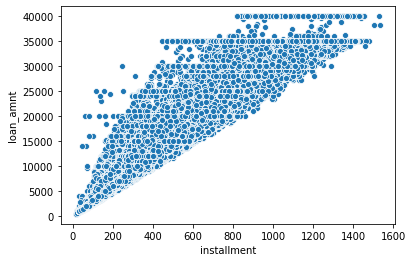

In [35]:
sns.scatterplot(x='installment' , y='loan_amnt', data=df)

In [36]:
# box plot for checking relation about loan_status
# and loan_amount

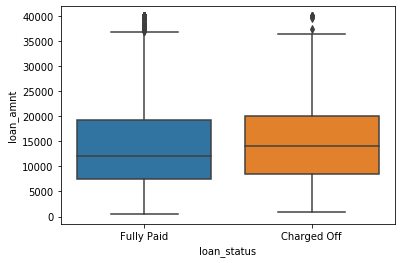

In [37]:
sns.boxplot(x='loan_status' , y='loan_amnt' , data=df)

Means if loan amount is higher then high chances of loan_payoff. 
Loan payoff means not able to pay loan and company clears the loan off.

In [41]:
# statistics for loan amount and loan_status
# incase box-plot does not show clear information

In [40]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


charged off avg is 15126 and fully paid avg is 13866
means people with not able to pay loans have taken higher amount of money.

In [43]:
# feature engineering

In [44]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [46]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [47]:
info_of_features('grade')
# LC = lending Club

LC assigned loan grade


In [48]:
info_of_features('sub_grade')

LC assigned loan subgrade


In [49]:
# so find relation in grade and sub_grade and loan_status

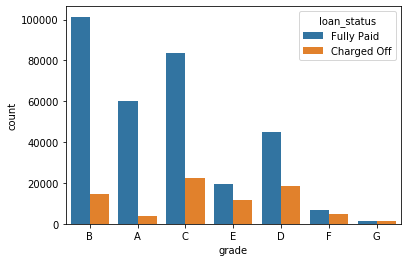

In [50]:
sns.countplot(x='grade' , data=df, hue='loan_status')

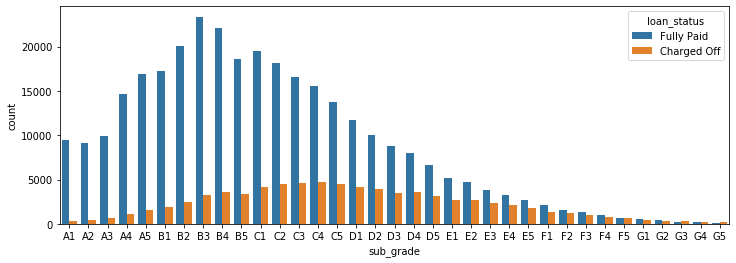

In [58]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade' , data=df, hue='loan_status', order=subgrade_order)

# subgrade_order will order it from A to G

So F and G grade people dont pay of loans , check for them.

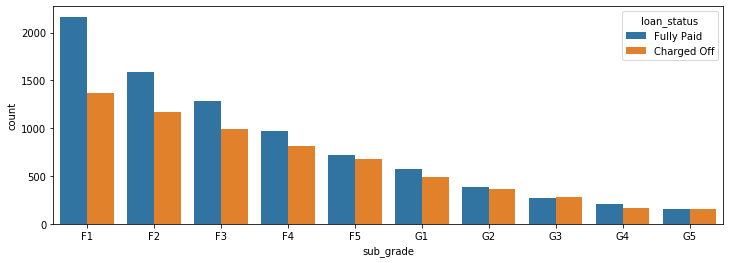

In [59]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]
plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade' , data=f_and_g, hue='loan_status', order=subgrade_order)

New column for loan_repaid and 0 if not paid
1 if loan paid

In [62]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

# keep the spellings of Fully Paid and Charged Off same
# DO NOT change them
# else all will be filled with NaN values.

In [63]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


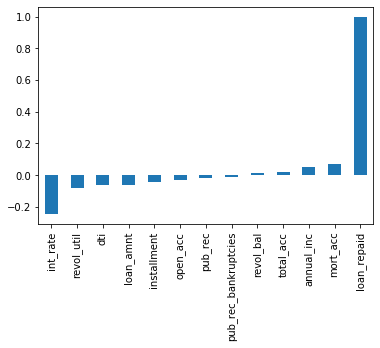

In [65]:
# checking for correlation

df.corr()['loan_repaid'].sort_values().plot(kind='bar')

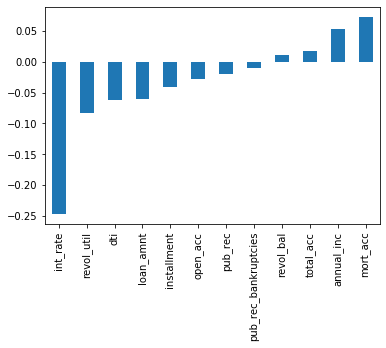

In [66]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

Interest rate has highest negative correlation.
Means higher the interest rate harder it will be to 
pay of the loan.

## Data Preprocessing

In [67]:
# missing values

In [68]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Missing values are present in: emp_title , emp_length,title,revol_util,mort_acc,pub_rec_bankruptcies

In [69]:
# get pecentage of missing data

100* df.isnull().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

less than 0.5% missing data can be dropped.

In [73]:
info_of_features('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [74]:
info_of_features('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [75]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [76]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [79]:
# non unique values?

df['emp_title'].nunique()

173105

It is not possible to encode 173105 columns as they are not unique.

In [78]:
df['emp_length'].nunique()

11

In [80]:
# drop emp_title

df = df.drop('emp_title', axis=1)
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [81]:
# emp_length column

In [83]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [84]:
emp_length_order = ['1 year',
 '< 1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

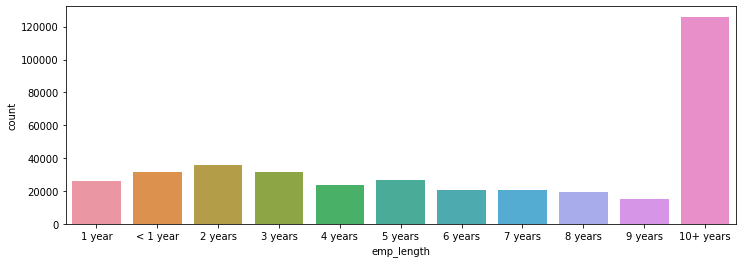

In [88]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=emp_length_order,
             )

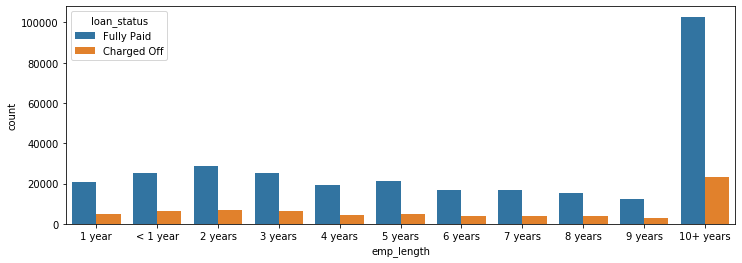

In [89]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=emp_length_order,
             hue='loan_status')

In [90]:
# percentage of charge off per employement category
# percenatge of people per employemnt did not pay back loans

In [95]:
emp_off = df[df['loan_status']=='Charged Off'].groupby("emp_length").count()['loan_status']

In [96]:
emp_paid_full = df[df['loan_status']=='Fully Paid'].groupby("emp_length").count()['loan_status']

In [99]:
emp_off/emp_paid_full

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

ALmost all values are same , so there is not much difference in the employement_length columns.

In [100]:
# so we can drop the column

df = df.drop('emp_length', axis=1)

In [102]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [103]:
# still missing data!

In [104]:
df['purpose'].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [105]:
info_of_features('purpose')

A category provided by the borrower for the loan request. 


In [106]:
info_of_features('title')

The loan title provided by the borrower


In [107]:
df['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [108]:
# cell 104 and 107 show that title and purpose columns 
# almost contain same level of information 
# so we can drop it.

In [109]:
df= df.drop('title' , axis=1)

In [110]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [111]:
# maximum missing values are in mort_acc

In [116]:
df['mort_acc'].value_counts()


0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

0.0 means 0 percent of people of mortage accounts
34,28,30 etc are outliers!!

We can not drop the mort_acc because it alone has 10% of data

In [117]:
# so we fill the data instead of removing the column

In [118]:
# see what column is highly correlated with mort_acc ,
# so that we can fill the misssing values with these 
# values

In [119]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [120]:
# total_acc  has correlation of 0.38
# means totalk_acc is correlated with mort_acc

In [121]:
# use fillna method 

In [123]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

the average of mortgae account is 0 if total account = 2
average of mortgae account is 0.15 if total acount = 6

In [124]:
total_account_mean = df.groupby('total_acc').mean()['mort_acc']

In [125]:
def fill_mortgage_accounts(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return total_account_mean[total_acc]
    else:
        return mort_acc

In [126]:
df['mort_acc'] = df.apply(lambda x: fill_mortgage_accounts(x['total_acc'],x['mort_acc']), axis=1)

In [128]:
df.isnull().sum()

# so now mort_acc has 0 missing values

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [129]:
# drop other cols

df = df.dropna()

In [130]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

*No more missing data!*

## Work with categorical data

In [131]:
# find out if all cols have same data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
loan_amnt               395219 non-null float64
term                    395219 non-null object
int_rate                395219 non-null float64
installment             395219 non-null float64
grade                   395219 non-null object
sub_grade               395219 non-null object
home_ownership          395219 non-null object
annual_inc              395219 non-null float64
verification_status     395219 non-null object
issue_d                 395219 non-null object
loan_status             395219 non-null object
purpose                 395219 non-null object
dti                     395219 non-null float64
earliest_cr_line        395219 non-null object
open_acc                395219 non-null float64
pub_rec                 395219 non-null float64
revol_bal               395219 non-null float64
revol_util              395219 non-null float64
total_acc               395219 non

object and float are dtypes

In [132]:
# select only object dtypes

In [134]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [135]:
info_of_features('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [136]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [137]:
# to convert it , use one it as integers

Use mapping to map 36 months to 36
and 60 months to 60

In [138]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

C:\Users\0023ND744\Anaconda3\envs\tfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [140]:
# now the grade feature and sub_grade
# but sub_grade already has grade info.
# so dropping grade

df = df.drop('grade' , axis=1)

In [141]:
# convert subgrade

In [142]:
# get dummies

dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

# below will concat dummies column with original sub_grade column
df = pd.concat([df.drop('sub_grade', axis=1), dummies] , axis=1)

In [143]:
df.columns
# number of cols increased because of one-hot encoding

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [144]:
# same dummies for verification status , application type , purpse , initial list.

In [147]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']], drop_first=True)

df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [148]:
# now for home_ownership col

df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [149]:
# put None and Any in Other as they are small in values

In [150]:
# use replace method

In [151]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [152]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [153]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

df = pd.concat([df.drop('home_ownership', axis=1), dummies] , axis=1)

In [154]:
# now for address column

In [155]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [156]:
# extract the zip codes

In [157]:
df['zip_code']=df['address'].apply(lambda address: address[-5:])

In [158]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [159]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)

df = pd.concat([df.drop('zip_code', axis=1), dummies] , axis=1)

In [160]:
df = df.drop('address' , axis=1)

In [161]:
# now issue_d column

In [162]:
info_of_features('issue_d')

The month which the loan was funded


In [163]:
# not much of useful col : issue_d

In [164]:
df = df.drop('issue_d' , axis=1)

In [165]:
# now for earliest_cr_line

In [166]:
info_of_features('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [167]:
# extract the year and month from this 

df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [168]:
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [170]:
df['earliest_cr_line']
# this gives only the year 
# i.e 1990,2004,2007 etc..

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

## Train test split

In [171]:
from sklearn.model_selection import train_test_split

In [173]:
df = df.drop('loan_status' , axis=1)
# drop this because we have created a loan_repaid colum
# already

KeyError: "['loan_status'] not found in axis"

In [174]:
X = df.drop('loan_repaid', axis=1).values

y = df['loan_repaid'].values

In [176]:
# incase RAM is small

df = df.sample(frac=0.1, random_state=42)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [178]:
from sklearn.preprocessing import MinMaxScaler

In [179]:
scaler = MinMaxScaler()

In [180]:
X_train = scaler.fit_transform(X_train)

In [181]:
X_test = scaler.transform(X_test)

### Model creation

In [182]:
# import tf libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [183]:
model = Sequential()

# using 78 neurons because there are 78 features 
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1,activation='sigmoid'))

# compile

model.compile(loss='binary_crossentropy' , optimizer='adam')

In [184]:
# fit the model

In [187]:
model.fit(x=X_train , y= y_train, 
          epochs = 25,
         batch_size=256, # if dataset is too large,
         validation_data=(X_test,y_test))

Train on 296414 samples, validate on 98805 samples
Epoch 1/25
296414/296414 [==============================] - 3s 11us/sample - loss: 0.2635 - val_loss: 0.2599
Epoch 2/25
296414/296414 [==============================] - 3s 10us/sample - loss: 0.2627 - val_loss: 0.2604
Epoch 3/25
296414/296414 [==============================] - 4s 14us/sample - loss: 0.2624 - val_loss: 0.2594
Epoch 4/25
296414/296414 [==============================] - 4s 15us/sample - loss: 0.2619 - val_loss: 0.2594
Epoch 5/25
296414/296414 [==============================] - 4s 13us/sample - loss: 0.2616 - val_loss: 0.2596
Epoch 6/25
296414/296414 [==============================] - 3s 11us/sample - loss: 0.2613 - val_loss: 0.2601: 0s - loss: 0.2
Epoch 7/25
296414/296414 [==============================] - 3s 12us/sample - loss: 0.2612 - val_loss: 0.2592
Epoch 8/25
296414/296414 [==============================] - 3s 12us/sample - loss: 0.2610 - val_loss: 0.2596
Epoch 9/25
296414/296414 [==============================] - 4

## Model Saving

In [188]:
from tensorflow.keras.models import load_model

In [189]:
model.save('try_01.h5')

## Model Evaluation

In [191]:
losses = pd.DataFrame(model.history.history)

In [193]:
losses

,loss,val_loss
0,0.263549,0.259940
1,0.262744,0.260427
2,0.262351,0.259421
3,0.261898,0.259409
4,0.261621,0.259582
5,0.261334,0.260141
6,0.261197,0.259244
7,0.261041,0.259588
8,0.260651,0.259188
9,0.260353,0.259686


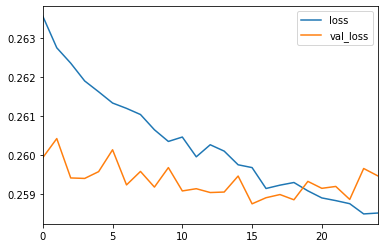

In [192]:
losses.plot()

In [194]:
# adding early stopping and increasing epochs!!

In [195]:
from sklearn.metrics import classification_report

In [196]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))